# K-Nearest Neighbors (K-NN) Algorithm

KNN is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It is a non-parametric method, which means it does not make any assumptions about the underlying data distribution. This is an extremely useful feature since most of the real-world data does not follow any theoretical distribution. It is also a lazy learning algorithm, meaning it does not have a specialized training phase. This also means that there is no explicit training phase or it is very minimal. This makes the KNN algorithm much faster than other algorithms that require training. The KNN algorithm is based on feature similarity: How closely out-of-sample features resemble our training set determines how we classify a given data point.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood. The KNN algorithm can be summarized as below:


1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
    - Calculate the distance between the query example and the current example from the data.
    - Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels


Disadvantages of KNN:
- The KNN algorithm does not work well with high-dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
- The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets, the cost of calculating the distance between new point and each existing point is huge, which degrades the performance of the algorithm.
- Finally, the KNN algorithm does not work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

Advantages of KNN:

- The KNN algorithm is very simple and easy to implement.
- There is no need to build a model, tune several parameters, or make additional assumptions.
- The KNN algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).

In this notebook, we will implement the KNN algorithm for classification and regression problems using Python.

In [12]:
# Example of KNN classfier on Iris data using SNS

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd


In [13]:
#load the iris data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
#split the data into features and labels

X=df.drop('species',axis=1)
y=df['species']

In [16]:
# load and fit the KNN classifier on the data 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

#predict the species of the new iris flower
new_measurement = np.array([3.1,5.2, 4, 2]).reshape(1, -1)
knn.predict(new_measurement)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



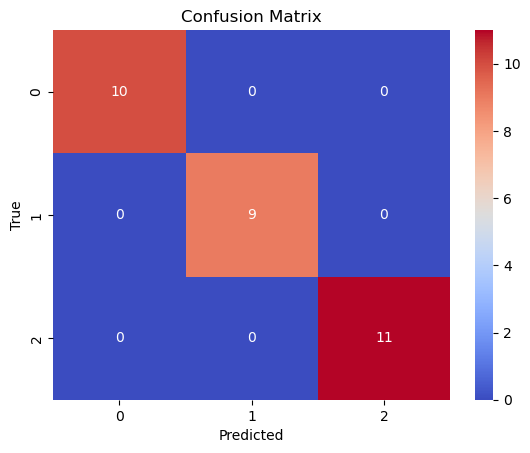

In [18]:
# train test split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

# predict the species of the test data  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#plot the confusion matrix from heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### For regression problems on tips data set from SNS, the KNeighborsRegressor class is used.




In [28]:
#load the data

tips= sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [32]:
# Encode the categorical data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = tips.drop('tip', axis=1)
y = tips['tip']
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [33]:
# train and split the data and run the model 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
 


# split the data into features and labels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)


#fit the model and predict the tip
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#evluate the model

from sklearn.metrics import mean_squared_error

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {model.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))})")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881)


In [34]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [45]:
#predict the tip for the new customer


model.predict([[39.82, 1, 1,0,0,8]])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([4.262])